### 1. Import and data loading

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chess
from pandarallel import pandarallel

In [2]:
# Load data
df = pd.read_csv("data/chess_games_raw.csv")
df

/tmp/ipykernel_20015/2651139906.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/chess_games_raw.csv")


,Event,Site,Date,Round,White,Black,Result,ECO,WhiteElo,BlackElo,PlyCount,EventDate,EventType,Termination,Moves
0,Rated Blitz game,lichess.org,2024.01.01,?,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,49.0,2024.??.??,blitz,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...
1,Rated Blitz game,lichess.org,2024.01.01,?,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,71.0,2024.??.??,blitz,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...
2,Rated Blitz game,lichess.org,2024.01.01,?,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,59.0,2024.??.??,blitz,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...
3,Rated Blitz game,lichess.org,2024.01.01,?,Chigorinez,Luhrman,1-0,B40,2542,2433,71.0,2024.??.??,blitz,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...
4,Rated Blitz game,lichess.org,2024.01.01,?,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,56.0,2024.??.??,blitz,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269261,Rated Blitz game,?,2024.12.31,-,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,NaN,NaN,NaN,Normal,e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bx...
3269262,Rated Blitz game,?,2024.12.31,-,cad2024,emiliofelixramirez,1-0,D23,2537,2449,NaN,NaN,NaN,Time forfeit,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...
3269263,Rated Blitz game,?,2024.12.31,-,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,NaN,NaN,NaN,Time forfeit,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...
3269264,Rated Blitz game,?,2024.12.31,-,lotrisking,ezis71,1-0,D30,2513,2398,NaN,NaN,NaN,Normal,d4 d5 c4 e6 Nf3 a6 g3 dxc4 Bg2 b5 O-O Bb7 a4 N...


### 2. Initial data exploration 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269266 entries, 0 to 3269265
Data columns (total 15 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Event        object 
 1   Site         object 
 2   Date         object 
 3   Round        object 
 4   White        object 
 5   Black        object 
 6   Result       object 
 7   ECO          object 
 8   WhiteElo     int64  
 9   BlackElo     int64  
 10  PlyCount     float64
 11  EventDate    object 
 12  EventType    object 
 13  Termination  object 
 14  Moves        object 
dtypes: float64(1), int64(2), object(12)
memory usage: 374.1+ MB


In [4]:
df.isnull().sum()

Event                0
Site                 0
Date                 0
Round                0
White                0
Black                0
Result               0
ECO                336
WhiteElo             0
BlackElo             0
PlyCount       2707355
EventDate      2707355
EventType      2711070
Termination          0
Moves             1010
dtype: int64

In [5]:
df.describe()

,WhiteElo,BlackElo,PlyCount
count,3.269266e+06,3.269266e+06,561911.000000
mean,2.569311e+03,2.568953e+03,87.919028
std,1.342731e+02,1.328460e+02,40.879115
min,2.300000e+03,2.300000e+03,0.000000
25%,2.500000e+03,2.500000e+03,60.000000
50%,2.545000e+03,2.545000e+03,81.000000
75%,2.620000e+03,2.620000e+03,110.000000
max,3.367000e+03,3.390000e+03,600.000000


In [6]:
df['Date'].value_counts()

Date
2024.12.28    13967
2024.05.11    11704
2024.02.10    11302
2024.01.22    10984
2024.01.13    10935
              ...  
2024.06.22     7495
2024.08.24     7342
2024.08.03     7209
2024.10.26     7143
2024.09.12     4500
Name: count, Length: 366, dtype: int64

### 3. Drop columns that has many missing data or irrelevant

In [7]:
df = df.drop(['Site', 'Round', 'PlyCount', 'EventDate'], axis=1)
df = df.dropna(subset=['ECO', 'Moves'])
df.isnull().sum()

Event                0
Date                 0
White                0
Black                0
Result               0
ECO                  0
WhiteElo             0
BlackElo             0
EventType      2710396
Termination          0
Moves                0
dtype: int64

### 4. Convert data types

In [8]:
df['WhiteElo'] = df['WhiteElo'].astype(int)
df['BlackElo'] = df['BlackElo'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3268256 entries, 0 to 3269265
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Event        object
 1   Date         object
 2   White        object
 3   Black        object
 4   Result       object
 5   ECO          object
 6   WhiteElo     int64 
 7   BlackElo     int64 
 8   EventType    object
 9   Termination  object
 10  Moves        object
dtypes: int64(2), object(9)
memory usage: 299.2+ MB


### 5. Remove * or unfinished games rows 

In [9]:
df = df[df['Result'].isin(['1-0', '0-1', '1/2-1/2'])]
df['Result'].value_counts()

Result
1-0        1508074
0-1        1338304
1/2-1/2     421755
Name: count, dtype: int64


Move count statistics:
  Mean: 87.5 half-moves
  Median: 81 half-moves
  Min: 1
  Max: 601

Games by move count:
  ≤20 moves (opening):    27,370 (  0.8%)
  21-40 moves (early):   227,627 (  7.0%)
  41-60 moves (mid):     612,500 ( 18.7%)
  61-80 moves (late):    747,638 ( 22.9%)
  81+ moves (endgame):  1,652,998 ( 50.6%)


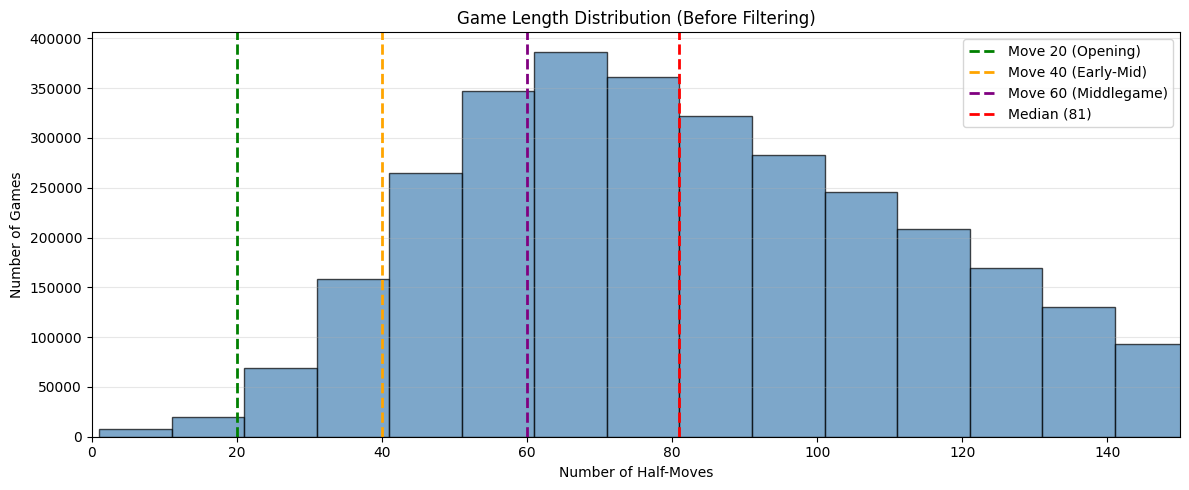

In [10]:
df['NumMoves'] = df['Moves'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

print(f"\nMove count statistics:")
print(f"  Mean: {df['NumMoves'].mean():.1f} half-moves")
print(f"  Median: {df['NumMoves'].median():.0f} half-moves")
print(f"  Min: {df['NumMoves'].min()}")
print(f"  Max: {df['NumMoves'].max()}")

print(f"\nGames by move count:")
print(f"  ≤20 moves (opening):  {(df['NumMoves']<=20).sum():>8,} ({(df['NumMoves']<=20).mean()*100:>5.1f}%)")
print(f"  21-40 moves (early):  {((df['NumMoves']>20) & (df['NumMoves']<=40)).sum():>8,} ({((df['NumMoves']>20) & (df['NumMoves']<=40)).mean()*100:>5.1f}%)")
print(f"  41-60 moves (mid):    {((df['NumMoves']>40) & (df['NumMoves']<=60)).sum():>8,} ({((df['NumMoves']>40) & (df['NumMoves']<=60)).mean()*100:>5.1f}%)")
print(f"  61-80 moves (late):   {((df['NumMoves']>60) & (df['NumMoves']<=80)).sum():>8,} ({((df['NumMoves']>60) & (df['NumMoves']<=80)).mean()*100:>5.1f}%)")
print(f"  81+ moves (endgame):  {(df['NumMoves']>80).sum():>8,} ({(df['NumMoves']>80).mean()*100:>5.1f}%)")

# Visualization
plt.figure(figsize=(12, 5))
plt.hist(df['NumMoves'], bins=60, color='steelblue', edgecolor='black', alpha=0.7)
plt.axvline(20, color='green', linestyle='--', linewidth=2, label='Move 20 (Opening)')
plt.axvline(40, color='orange', linestyle='--', linewidth=2, label='Move 40 (Early-Mid)')
plt.axvline(60, color='purple', linestyle='--', linewidth=2, label='Move 60 (Middlegame)') 
plt.axvline(df['NumMoves'].median(), color='red', linestyle='--', linewidth=2, 
            label=f"Median ({df['NumMoves'].median():.0f})")
plt.xlabel('Number of Half-Moves')
plt.ylabel('Number of Games')
plt.title('Game Length Distribution (Before Filtering)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.xlim(0, 150)
plt.tight_layout()
plt.show()

### 6. Extract first N moves

In [11]:
pandarallel.initialize(nb_workers=12, progress_bar=True)

def extract_early_game_data(moves_str, num_half_moves=20):
    """
    Extract first N half-moves AND board state at that position
    """
    if pd.isna(moves_str) or moves_str == '':
        return '', 0, None
    
    moves_list = str(moves_str).split()
    total_plies = len(moves_list)
    first_N = ' '.join(moves_list[:num_half_moves])
    
    # Play through first N moves and save board state
    board = chess.Board()
    for move_san in moves_list[:num_half_moves]:
        try:
            board.push_san(move_san)
        except:
            break
    
    # Save board as FEN 
    board_fen = board.fen() if total_plies >= num_half_moves else None
    
    return first_N, total_plies, board_fen

NUM_MOVES = 80

df[['FirstNMoves', 'TotalPlies', 'BoardStateAtMoveN']] = df['Moves'].parallel_apply(
    lambda x: pd.Series(extract_early_game_data(x, NUM_MOVES))
)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
games_before = len(df)
df = df[df['TotalPlies'] >= NUM_MOVES]
games_after = len(df)
print(f"  Before: {games_before:,} games")
print(f"  After:  {games_after:,} games")
print(f"  Removed: {games_before - games_after:,} ({(games_before-games_after)/games_before*100:.1f}%)")

  Before: 3,268,133 games
  After:  1,686,183 games
  Removed: 1,581,950 (48.4%)


### 7. Parse and group game type into 3 categories

In [13]:
#df['Event'].unique()
df['Event'].value_counts()

Event
Rated Blitz game                                                  1467256
Rated Rapid game                                                   113441
Rated Classical game                                                13109
Rated Blitz tournament https://lichess.org/tournament/winter24       2780
Rated Blitz tournament https://lichess.org/tournament/spring24       1795
                                                                   ...   
Rated Blitz tournament https://lichess.org/tournament/Pa5w27qG          1
Rated Rapid tournament LD1p6JB7                                         1
Rated Blitz tournament KVnOJ8QW                                         1
Rated Blitz tournament q3oGzvzp                                         1
Rated Rapid tournament 8G1ZG5sm                                         1
Name: count, Length: 7134, dtype: int64

In [14]:
def extract_time_class(event):
    event_lower = str(event).lower()
    if 'blitz' in event_lower:
        return 'blitz'
    elif 'rapid' in event_lower:
        return 'rapid'
    elif 'classical' in event_lower:
        return 'classical'
    else:
        return np.nan

df['EventType'] = df['Event'].apply(extract_time_class)
df = df[df['EventType'].notna()]
df['EventType'].value_counts(dropna=False)

EventType
blitz        1557487
rapid         115562
classical      13134
Name: count, dtype: int64

### 8. Drop duplicates 

In [15]:
df[df.duplicated()]

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,Moves,NumMoves,FirstNMoves,TotalPlies,BoardStateAtMoveN
882714,Rated Blitz game,2024.04.05,ProteusSF-Godot,No-StockFish-Bots,1/2-1/2,C67,2995,2996,blitz,Normal,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 Re1 Nd6 Nxe5 Be...,93,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 Re1 Nd6 Nxe5 Be...,93,3k4/7Q/1p1n3p/p1q3p1/P3p3/4P3/1P2B1PP/6K1 w - ...
998219,Rated Blitz game,2024.04.18,Intron014,zlatana75,1/2-1/2,C52,2984,2992,blitz,Normal,e4 e5 Nf3 Nc6 Bc4 Bc5 b4 Bxb4 c3 Ba5 d4 d6 Qb3...,80,e4 e5 Nf3 Nc6 Bc4 Bc5 b4 Bxb4 c3 Ba5 d4 d6 Qb3...,80,6k1/1Q3pp1/P5r1/2p4p/5b2/2P4P/5PK1/1Rn1r3 w - ...
2019118,Rated Blitz game,2024.08.15,Lenya228_BOT,PetersBot,1/2-1/2,D41,3038,3017,blitz,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,120,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,120,8/p2R2p1/1p4kp/8/5n2/5P2/r6P/5RK1 w - - 3 41
2038131,Rated Classical game,2024.08.17,PetersBot,Correspondence-ai,1/2-1/2,D41,2737,2690,classical,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,118,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,118,5k2/5p2/5np1/1p3r2/5P2/1B2K1p1/P2R3P/8 w - - 0 41
2050400,Rated Classical game,2024.08.18,PetersBot,Correspondence-ai,1/2-1/2,D41,2737,2772,classical,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,97,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,97,5k2/5p2/5np1/1p3r2/5P2/1B2K1p1/P2R3P/8 w - - 0 41
2050479,Rated Classical game,2024.08.18,PetersBot,Correspondence-ai,1/2-1/2,D41,2737,2772,classical,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,97,d4 Nf6 c4 e6 Nf3 d5 Nc3 c5 cxd5 Nxd5 e4 Nxc3 b...,97,5k2/5p2/5np1/1p3r2/5P2/1B2K1p1/P2R3P/8 w - - 0 41
2065839,Rated Classical game,2024.08.20,PetersBot,Correspondence-ai,1/2-1/2,D38,2744,2750,classical,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 cxd5 exd5 Bg5 h6 B...,104,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 cxd5 exd5 Bg5 h6 B...,104,8/5p2/2B1b1kp/4P1p1/2r5/4R1KP/5PP1/8 w - - 14 41
2068749,Rated Classical game,2024.08.20,PetersBot,Correspondence-ai,1/2-1/2,D38,2744,2746,classical,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 cxd5 exd5 Bg5 h6 B...,104,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 cxd5 exd5 Bg5 h6 B...,104,8/5p2/2B1b1kp/4P1p1/2r5/4R1KP/5PP1/8 w - - 12 41
2755210,Rated Classical game,2024.11.06,Nikitosik-ai,mayhem23111,1/2-1/2,D38,2822,2774,classical,Normal,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 Bg5 h6 Bxf6 Qxf6 e...,85,d4 Nf6 c4 e6 Nf3 d5 Nc3 Bb4 Bg5 h6 Bxf6 Qxf6 e...,85,3Qbk2/p4pp1/1p2p2p/8/3N1P2/P3PK1P/1q4P1/8 w - ...
2756428,Rated Classical game,2024.11.06,mayhem23111,Nikitosik-ai,1/2-1/2,C67,2776,2831,classical,Normal,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 Re1 Nd6 Nxe5 Be...,84,e4 e5 Nf3 Nc6 Bb5 Nf6 O-O Nxe4 Re1 Nd6 Nxe5 Be...,84,8/5p2/6k1/3p1p1p/2pPnP1P/2P2B2/1P2RPK1/r7 w - ...


In [16]:
df = df.drop_duplicates()

### 8. Drop columns not use as features

In [17]:
# Full move list and Total plies are for filtering
df = df.drop(['Moves', 'TotalPlies'], axis=1)
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,NumMoves,FirstNMoves,BoardStateAtMoveN
5,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,98,e4 c5 Nf3 e6 d3 d5 Nbd2 Nf6 g3 Nc6 Bg2 Be7 O-O...,6k1/3n1p1p/2b1p1pP/1B1pP1N1/1R1P1PN1/q1p3P1/2P...
7,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,155,c4 c6 d4 d5 Nf3 Nf6 Nc3 e6 e3 Nbd7 Qc2 Bd6 Bd3...,4r3/1N1RP1pk/1R2K2p/8/1p2n3/rP4P1/8/8 w - - 7 41
10,Rated Blitz game,2024.01.01,KhusnutDudajanMag,O-Almeida,1-0,A00,2558,2685,blitz,Time forfeit,137,e3 g6 Nf3 Bg7 d4 f5 b3 Nf6 Bb2 O-O Nbd2 d6 c4 ...,2r2r2/1p2q1k1/3p2p1/1P6/p1PRPP2/7p/P3BQ2/6K1 w...
11,Rated Blitz game,2024.01.01,david_gomez,Marvel2,0-1,E81,2514,2351,blitz,Normal,98,d4 g6 e4 Bg7 c4 d6 Nc3 Nf6 f3 O-O Be3 c5 Nge2 ...,8/5p1p/p5p1/1k1bB3/4rP2/4K1P1/7P/8 w - - 1 41
12,Rated Blitz game,2024.01.01,che6ype1ka,ARDosina,1-0,D42,2582,2494,blitz,Normal,93,Nf3 e6 c4 d5 e3 Nf6 Nc3 c5 cxd5 Nxd5 d4 Nc6 Bd...,3R4/p1r3k1/1p2p3/4P1p1/2q1QpP1/P7/6P1/5K2 w - ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269254,Rated Blitz game,2024.12.31,hungzhao,Senkokay,1-0,B45,2676,2479,blitz,Normal,95,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e6 Ndb5 Bb4...,1R6/p3r1pp/6k1/2pR1p2/P4Kn1/2P5/6PP/8 w - - 3 41
3269258,Rated Blitz game,2024.12.31,The_Knight_Road,DanyMany,1-0,B01,2541,2437,blitz,Time forfeit,99,e4 d5 exd5 Qxd5 Nc3 Qd6 Nf3 Nf6 Bc4 Nc6 O-O a6...,8/4kp1B/4p3/2npP2p/p2N1P1K/P1P5/6P1/3b4 w - - ...
3269262,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,123,d4 d5 c4 dxc4 Nf3 Nf6 g3 Nc6 Bg2 Be6 O-O h6 Nc...,8/5p1k/3q1Ppp/3P4/3Qp1P1/7P/1R4B1/2r3K1 w - - ...
3269263,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,104,Nf3 Nf6 c4 e6 Nc3 Be7 e4 O-O d4 c5 d5 exd5 cxd...,3r4/8/p1RBn1p1/P4k1p/7P/3K1PP1/8/8 w - - 4 41


### 9. Export cleaned data

In [18]:
df.to_csv('data/chess_games_clean.csv', index=False)